In [50]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler,LabelEncoder,OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sbn
import plotly.express as px
import pickle

In [51]:
path = 'x_credit_risk.plk'
with open(path,'rb') as m:
    x_credit_risk,y_credit_risk = pickle.load(m)

In [52]:
x_credit_risk

array([[2, 0, 1, 0],
       [1, 0, 1, 1],
       [1, 1, 1, 1],
       [1, 1, 1, 2],
       [1, 1, 1, 2],
       [1, 1, 0, 2],
       [2, 1, 1, 0],
       [2, 1, 0, 2],
       [0, 1, 1, 2],
       [0, 0, 0, 2],
       [0, 0, 1, 0],
       [0, 0, 1, 1],
       [0, 0, 1, 2],
       [2, 0, 1, 1]], dtype=object)

In [53]:
y_credit_risk

array(['alto', 'alto', 'moderado', 'alto', 'baixo', 'baixo', 'alto',
       'moderado', 'baixo', 'baixo', 'alto', 'moderado', 'baixo', 'alto'],
      dtype=object)

In [54]:
tree_risk_credit = DecisionTreeClassifier(criterion='entropy')
tree_risk_credit.fit(x_credit_risk,y_credit_risk)


DecisionTreeClassifier(criterion='entropy')

In [55]:
tree_risk_credit.feature_importances_

array([0.41607015, 0.10294068, 0.03885431, 0.44213486])

In [56]:
tree_risk_credit.classes_

array(['alto', 'baixo', 'moderado'], dtype=object)

[Text(0.5555555555555556, 0.9166666666666666, 'renda <= 1.5\nentropy = 1.531\nsamples = 14\nvalue = [6, 5, 3]\nclass = alto'),
 Text(0.3333333333333333, 0.75, 'história de credito <= 1.5\nentropy = 0.863\nsamples = 7\nvalue = [5, 0, 2]\nclass = alto'),
 Text(0.4444444444444444, 0.8333333333333333, 'True  '),
 Text(0.2222222222222222, 0.5833333333333334, 'renda <= 0.5\nentropy = 1.0\nsamples = 4\nvalue = [2, 0, 2]\nclass = alto'),
 Text(0.1111111111111111, 0.4166666666666667, 'entropy = 0.0\nsamples = 1\nvalue = [1, 0, 0]\nclass = alto'),
 Text(0.3333333333333333, 0.4166666666666667, 'história de credito <= 0.5\nentropy = 0.918\nsamples = 3\nvalue = [1, 0, 2]\nclass = moderado'),
 Text(0.2222222222222222, 0.25, 'entropy = 0.0\nsamples = 1\nvalue = [0, 0, 1]\nclass = moderado'),
 Text(0.4444444444444444, 0.25, 'dívida <= 0.5\nentropy = 1.0\nsamples = 2\nvalue = [1, 0, 1]\nclass = alto'),
 Text(0.3333333333333333, 0.08333333333333333, 'entropy = 0.0\nsamples = 1\nvalue = [1, 0, 0]\nclass 

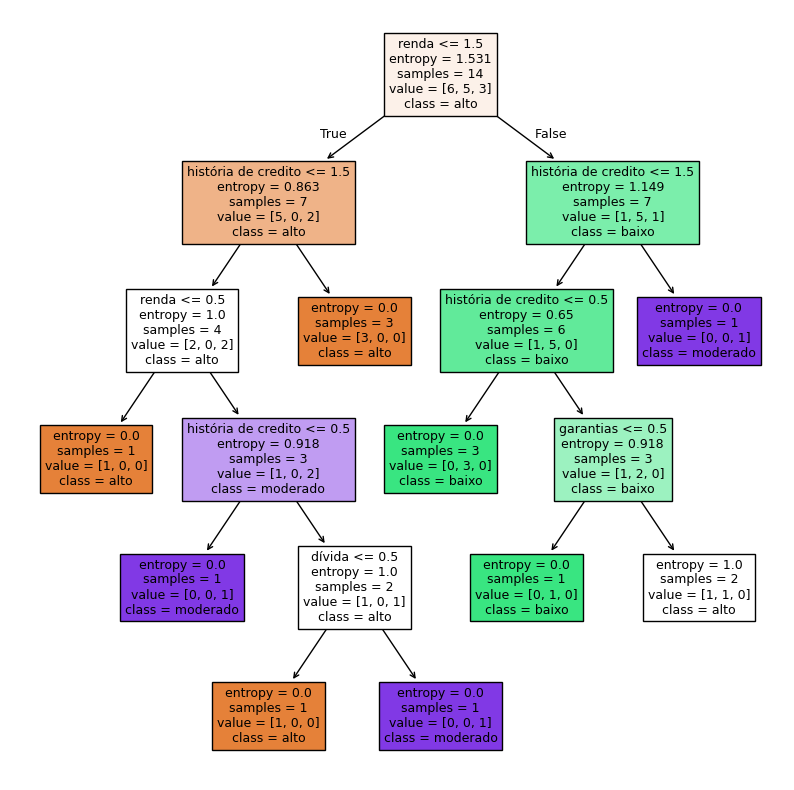

In [57]:
previsores = ['história de credito','dívida','garantias','renda']
figure,ax = plt.subplots(nrows=1,ncols=1,figsize=(10,10))
tree.plot_tree(tree_risk_credit,feature_names=previsores,class_names=tree_risk_credit.classes_,filled=True)

In [58]:
predict_risk = tree_risk_credit.predict([[0,0,1,2],[0,0,0,0]])
predict_risk

array(['baixo', 'alto'], dtype=object)

In [59]:
with open('x_credit.plk','rb') as f:
    x_credit_test,y_credit_test,x_credit_train,y_credit_train = pickle.load(f)

In [60]:
x_credit_test.shape,y_credit_test.shape

((1500, 3), (1500,))

In [61]:
x_credit_train.shape,y_credit_train.shape

((500, 3), (500,))

In [62]:
tree_credit = DecisionTreeClassifier(criterion='entropy',random_state=0)

In [63]:
tree_credit.fit(x_credit_train,y_credit_train)


DecisionTreeClassifier(criterion='entropy', random_state=0)

In [64]:
predict_credit =tree_credit.predict(x_credit_test)

In [65]:
predict_credit

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [66]:
y_credit_test
accuracy_score(y_credit_test,predict_credit)
print(classification_report(y_credit_test,predict_credit))

              precision    recall  f1-score   support

           0       0.98      0.99      0.98      1281
           1       0.94      0.88      0.91       219

    accuracy                           0.97      1500
   macro avg       0.96      0.93      0.95      1500
weighted avg       0.97      0.97      0.97      1500



[Text(0.6666666666666666, 0.9285714285714286, 'age <= -0.484\nentropy = 0.552\nsamples = 500\nvalue = [436, 64]\nclass = 0'),
 Text(0.5555555555555556, 0.7857142857142857, 'loan <= 0.454\nentropy = 0.946\nsamples = 176\nvalue = [112, 64]\nclass = 0'),
 Text(0.6111111111111112, 0.8571428571428572, 'True  '),
 Text(0.3333333333333333, 0.6428571428571429, 'income <= -0.501\nentropy = 0.619\nsamples = 130\nvalue = [110, 20]\nclass = 0'),
 Text(0.2222222222222222, 0.5, 'loan <= -0.594\nentropy = 0.913\nsamples = 61\nvalue = [41, 20]\nclass = 0'),
 Text(0.1111111111111111, 0.35714285714285715, 'entropy = 0.0\nsamples = 32\nvalue = [32, 0]\nclass = 0'),
 Text(0.3333333333333333, 0.35714285714285715, 'income <= -1.1\nentropy = 0.894\nsamples = 29\nvalue = [9, 20]\nclass = 1'),
 Text(0.2222222222222222, 0.21428571428571427, 'entropy = 0.0\nsamples = 13\nvalue = [0, 13]\nclass = 1'),
 Text(0.4444444444444444, 0.21428571428571427, 'loan <= 0.021\nentropy = 0.989\nsamples = 16\nvalue = [9, 7]\ncla

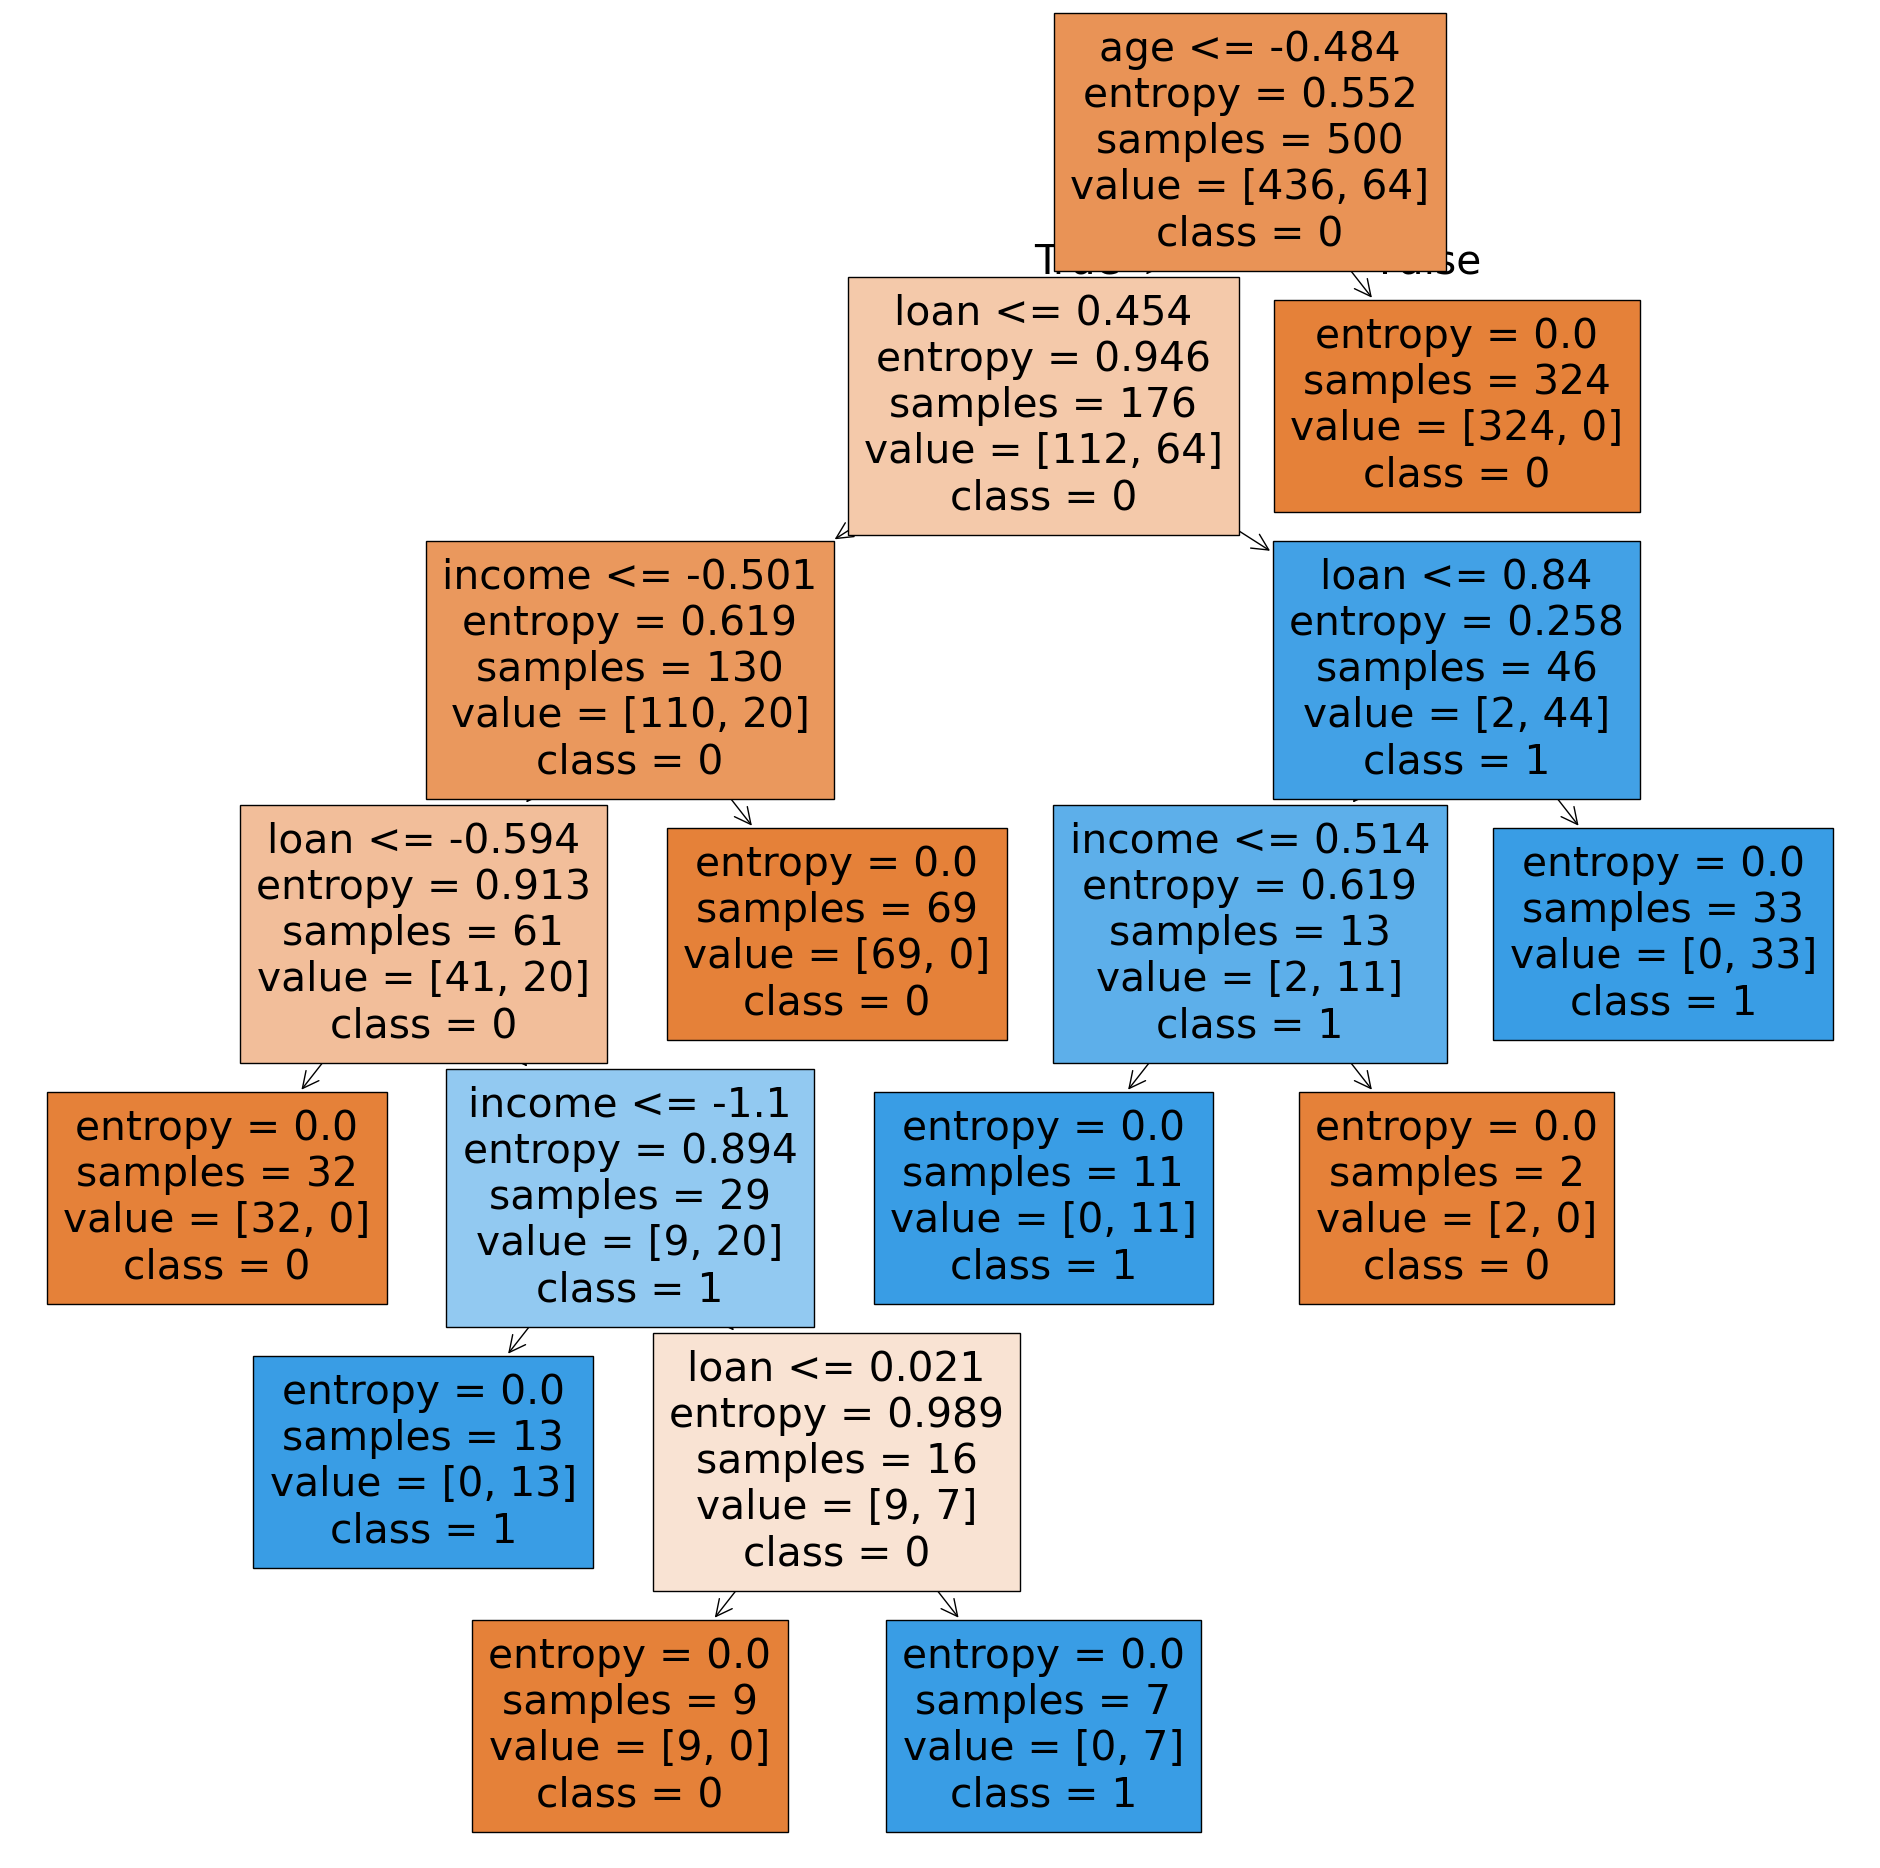

In [67]:
previsores_credit = ['income','age','loan']
figure,ax = plt.subplots(nrows=1,ncols=1,figsize=(24,24))
tree.plot_tree(tree_credit,feature_names=previsores_credit,class_names=['0','1'],filled=True)

In [68]:
with open('x_census.plk','rb') as c:
    x_census_test,y_census_test,x_census_train,y_census_train = pickle.load(c)

In [69]:
x_census_test.shape,y_census_test.shape

((9769, 108), (9769,))

In [70]:
x_census_train.shape,y_census_train.shape

((22792, 108), (22792,))

In [71]:
tree_census = DecisionTreeClassifier(criterion='entropy',random_state=0)
tree_census.fit(x_census_train,y_census_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [72]:
predict_census = tree_census.predict(x_census_test)
predict_census

array([' <=50K', ' <=50K', ' <=50K', ..., ' >50K', ' <=50K', ' <=50K'],
      dtype=object)

In [73]:
accuracy_score(y_census_test,predict_census)

0.8162555020984748

In [74]:
print(classification_report(y_census_test,predict_census))

              precision    recall  f1-score   support

       <=50K       0.88      0.87      0.88      7407
        >50K       0.62      0.64      0.63      2362

    accuracy                           0.82      9769
   macro avg       0.75      0.75      0.75      9769
weighted avg       0.82      0.82      0.82      9769



[Text(0.4749027063287528, 0.990909090909091, 'x[27] <= 0.08\nentropy = 0.796\nsamples = 22792\nvalue = [17313, 5479]'),
 Text(0.16576355174432422, 0.9727272727272728, 'x[105] <= 0.812\nentropy = 0.343\nsamples = 12274\nvalue = [11490.0, 784.0]'),
 Text(0.32033312903653854, 0.9818181818181819, 'True  '),
 Text(0.1053811665360881, 0.9545454545454546, 'x[104] <= 0.94\nentropy = 0.278\nsamples = 12062\nvalue = [11482, 580]'),
 Text(0.051702234654084175, 0.9363636363636364, 'x[102] <= -0.446\nentropy = 0.164\nsamples = 9701\nvalue = [9467.0, 234.0]'),
 Text(0.014472213174643696, 0.9181818181818182, 'x[107] <= 0.005\nentropy = 0.06\nsamples = 5298\nvalue = [5261, 37]'),
 Text(0.0109157812266169, 0.9, 'x[106] <= 5.288\nentropy = 0.034\nsamples = 4498\nvalue = [4482, 16]'),
 Text(0.009788990906449994, 0.8818181818181818, 'x[102] <= -1.252\nentropy = 0.029\nsamples = 4491\nvalue = [4478, 13]'),
 Text(0.009225595746366541, 0.8636363636363636, 'entropy = 0.0\nsamples = 1922\nvalue = [1922, 0]'),


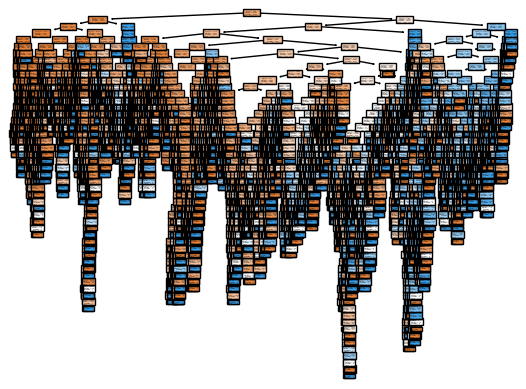

In [75]:
tree.plot_tree(tree_census,filled=True)